In [1]:
# PyTorch Workflow

In [2]:
what_i_covering ={1: "data (preparation and load)",
                  2: "build model",
                  3: "fit the model to data (training)",
                  4: "making predictions and evaluating a model (inference)",
                  5: "saving and loading a model",
                  6: "putting it all together"} 
          
what_i_covering
    


{1: 'data (preparation and load)',
 2: 'build model',
 3: 'fit the model to data (training)',
 4: 'making predictions and evaluating a model (inference)',
 5: 'saving and loading a model',
 6: 'putting it all together'}

In [3]:
# dependecies
import torch
from torch import nn # nn contains all of PyTorch's building blocks for neural network
import matplotlib.pyplot as plt
#check pytorch version
torch.__version__

'1.13.0+cu116'

# Data Preparing and loading
## data can be anything
* Excel Spreadsheet
* Images of any kind
* Videos ( YouTube has lots of data)
* Audio like songs or podcasts
* DNA
* Text
##Machine learning is a game of two parts
1. Get data into numerical representations
2. Build a model to learn patterns in that numerical representations


In [4]:
# lets create some data using linear regression formula
# slope = gradient
# I will use linear regression formula to make a straight line with known parameters


In [5]:
# create known parameters
# capital letter represents tensors and matrix and small letter represents vector

# create data

# create known parameters
weight = 0.7
bias = 0.3

start = 0
end =1
step =0.02

X= torch.arange(start, end, step).unsqueeze(dim=1)
#unsqueeze = add an extra dimention
y= weight*X+bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]), tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [6]:
len(X), len(y)

(50, 50)

### Splitting data into training and test sets
* Training set : (Course Materials) Model learns pattern from here
* Validation set : ( Practise Exam )- Tune model parameters
* Test Set (Final Exam)- See if the model is ready for the wild
* Generalization : The ability for a machine learning model to perform well on data it hasn't seen before

In [7]:
# create a test train split
train_split = int(0.8*len(X))
# train_split
#X_train = train features, y_train = train labels
#X_test = test features, y_test = test labels
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

In [8]:
X_train, y_train

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800],
         [0.2000],
         [0.2200],
         [0.2400],
         [0.2600],
         [0.2800],
         [0.3000],
         [0.3200],
         [0.3400],
         [0.3600],
         [0.3800],
         [0.4000],
         [0.4200],
         [0.4400],
         [0.4600],
         [0.4800],
         [0.5000],
         [0.5200],
         [0.5400],
         [0.5600],
         [0.5800],
         [0.6000],
         [0.6200],
         [0.6400],
         [0.6600],
         [0.6800],
         [0.7000],
         [0.7200],
         [0.7400],
         [0.7600],
         [0.7800]]), tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260],
         [0.4400],
         [0.4540],
         [0

How might we better visualize the data?

## Visualizing Data

In [9]:
def plot_predictions(train_data = X_train,
                     train_label=y_train,
                     test_data= X_test,
                     test_label=y_test,
                     predictions= None):
  """
  plots training data, test data and compare prediction
  """
  plt.figure(figsize=(10,7))

  # Plot the training data
  plt.scatter(train_data, train_label, c="b",s=4, label="Training Datasets")
  #plot the test data
  plt.scatter(test_data, test_label, c="g", s=4, label="Testing Datasets")

  # are there predictions ?
  if predictions is not None:
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")
  
  #show the legens
  plt.legend(prop={"size": 14});




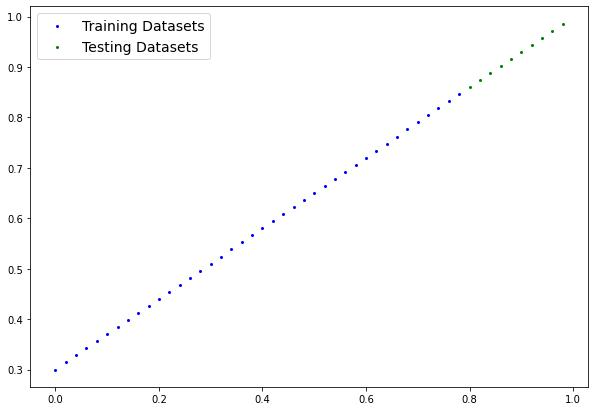

In [10]:
plot_predictions();

## Building PyTorch Model
what our model does:
* start with random values (weight and bias)
* look at the training data and adjust random values to better represent or get closer to the ideal values of weight and bias what we used to create the data

How does it do so?
Through two main algorithms
1. Gradeint descent 
2. Backpropagation


In [11]:
# almost everthing in PyTorch inherits from nn.Module

#creating a linear regression class
# Subclass nn.Module, this contains all the building blocks of NN

class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    #initialize model parameters inside constructos
    self.weights = nn.Parameter(torch.randn(1,
                                            requires_grad=True,
                                            dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1,
                                         requires_grad=True,
                                         dtype=torch.float))
    
    # Forward method to define the computation of the model

  def forward(self, x: torch.Tensor) -> torch.Tensor: # "x" is the input data
    return self.weights*x + self.bias # this is the regression formula


## Pytorch Model building essentials
* torch.nn - contains all of the building blocks fort computational graphs ( a neural network can be considered as computational graph)
*torch.nn.Parameters - what parameters should our model try and learn, often a PyTorch layer from torch.nn will set these for us
*torch.nn.Module - the base clas for all neural network modules, if you subclass it, you should overwrite forward()
*torch.optim -this is where the optimizers in PyTorch live, they will help the GD
* def forward() -all nn.Module subclasses requires you to overwirte forward(), this method defines what happens in the forward computations

## checking the contents of PyTorch Model

can check the model parameters or what's inside in the model by using .parameters()

In [12]:
torch.randn(1)

tensor([0.2331])

In [13]:
#create random seed
torch.manual_seed(42)

#create an instance of the model (this is a subclass of nn.Module)

model_0 = LinearRegressionModel()

#checking the parameters
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True), Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [14]:
# list the name of the parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [15]:
weight, bias

(0.7, 0.3)

## making predictions using torch.inference_mode()

* to check model's predictive power, let's see how well it predicts y_test based on x_test

* when we will pass data through our model, it is going to run it through forward() method. 

In [16]:
X_test, y_test

(tensor([[0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]), tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

In [17]:
# make predictions with model

# inference_mode() turns off the gradient tracking
# it makes ur code faster
with torch.inference_mode():
  y_preds = model_0 (X_test)
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [18]:
y_test - y_preds

tensor([[0.4618],
        [0.4691],
        [0.4764],
        [0.4836],
        [0.4909],
        [0.4982],
        [0.5054],
        [0.5127],
        [0.5200],
        [0.5272]])

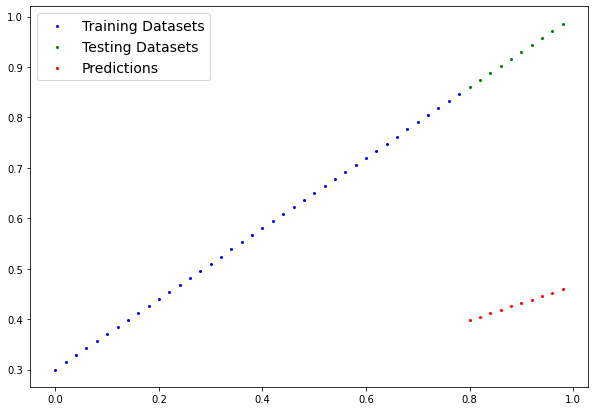

In [19]:
plot_predictions(predictions = y_preds)


In [20]:
y_preds=model_0(X_test)
y_preds
# it has gradient tracking function

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]], grad_fn=<AddBackward0>)

# Train Model

* The whole idea of training is for a model to move from some *unknown* parameters (These may be random) to some known parameters

* or in other world from a poor representation of data to a better representation of the data

* one way to measure how poor or good your model do perform can be identified using loss function

Things we need to train:
 
* loss function/cost function/ criterion
* optimizer - takes into account the loss of a model and adjust the model's parameters ( w, b)

For PyTorch, we need
1. A training Loop 
2. A testing Lopp

In [21]:
model_0.parameters()

<generator object Module.parameters at 0x7f822e3c94a0>

In [22]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True), Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [23]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

##Loss Function and Optimizer

In [24]:
# L1loss means Mean absoulute error (MAE)
#L2loss means Mean Square error (MSE)
#both are used for regression problem
#binary cross entropy loss is used for classification problem

# setup a loss function
nn_loss = nn.L1Loss()
# nn_loss

# our target is to minimize the value of the loss function by training
# loss function and optimizer works as a package and work together
# optimizer gives the model parameters w,b to minimize the loss function

# most popular optimizer - SGD ( Stochastic/ Random Gradient Descent)
# takes random number to improve the model
# and Adam optimizer

#the smaller the learning rate, the smaller the change in parameters
# the larger the learning rate, the larger the change in parameters

# setup an optimizer (SGD)
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.001)



### Building a training and testing loop in PyTorch

A couple of things we need in a training loop:

0. Loop through the data and do... ( doing all of the 2-5 steps within the loop)
1. forward pass ( this involves data moving through our model's "forward()" functions-also called forward pass. Make predictions on data
2. calculate the loss ( compare forward pass predictions to ground truth labels) 
3. optimizer zero grad
4. Loss backward - move backwards through the network to calculate the gradient of each of the parameters of our model with respect to the loss  **Backpropagation**
5. Optimizer step-( to minimize the gradient) use the optimizer to adjust our model's parameter to try and improve the loss. **Gradient Descent** make the gradients down to zero





In [25]:
# an Epoch is one loop through the data
epochs = 200

#track different values
epoch_count =[]
loss_values =[]
test_loss_values=[]

### Training

# step 0- loop through the data
for epoch in range(epochs):

  #set the model to training mode
  model_0.train() # training mode in PyTorch sets all the parameters that require gradients to require gradients
  
  # step 1- Forward Propagation
  y_pred = model_0(X_train)
  
  #step 2 - calculate the loss function
  loss = nn_loss(y_pred, y_train)
  # print(f"Loss: {loss}")

  #step 3- calculate the zero grad
  optimizer.zero_grad()

  #step 4- perform backpropagation on the loss with respect to the parameters of the model
  loss.backward()

  #step 5- step the optimizer ( perform gradient descent)

  optimizer.step()



  ### Testing
  model_0.eval() #turns off gradient tracking
  with torch.inference_mode():
    #1. doing the forward pass
    test_pred = model_0(X_test)
    #2. calculate the test loss
    test_loss =nn_loss(test_pred,y_test)
  
  # print out what's happening 
  if epoch % 10==0:
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)
    print(f"Epoch: {epoch} , Loss: {loss}, Test Loss: {test_loss}")
    print(model_0.state_dict())

  #print out model state_dict()
  # print(model_0.state_dict())





Epoch: 0 , Loss: 0.31288138031959534, Test Loss: 0.4931890368461609
OrderedDict([('weights', tensor([0.3371])), ('bias', tensor([0.1298]))])
Epoch: 10 , Loss: 0.3013603389263153, Test Loss: 0.4797181189060211
OrderedDict([('weights', tensor([0.3410])), ('bias', tensor([0.1398]))])
Epoch: 20 , Loss: 0.28983938694000244, Test Loss: 0.4662471413612366
OrderedDict([('weights', tensor([0.3449])), ('bias', tensor([0.1498]))])
Epoch: 30 , Loss: 0.2783183455467224, Test Loss: 0.4527761936187744
OrderedDict([('weights', tensor([0.3488])), ('bias', tensor([0.1598]))])
Epoch: 40 , Loss: 0.26679736375808716, Test Loss: 0.43930521607398987
OrderedDict([('weights', tensor([0.3527])), ('bias', tensor([0.1698]))])
Epoch: 50 , Loss: 0.2552763819694519, Test Loss: 0.4258342385292053
OrderedDict([('weights', tensor([0.3566])), ('bias', tensor([0.1798]))])
Epoch: 60 , Loss: 0.24375538527965546, Test Loss: 0.41236335039138794
OrderedDict([('weights', tensor([0.3605])), ('bias', tensor([0.1898]))])
Epoch: 7

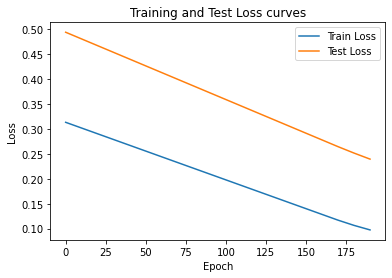

In [26]:
# plot the loss curves
import numpy as np
plt.plot(epoch_count,np.array(torch.tensor(loss_values).numpy()), label="Train Loss")
plt.plot(epoch_count, test_loss_values, label="Test Loss")
plt.title("Training and Test Loss curves")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend()

In [27]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.4146])), ('bias', tensor([0.3250]))])

In [28]:
weight, bias

(0.7, 0.3)

In [29]:
with torch.inference_mode():
  y_preds_new =model_0(X_test)

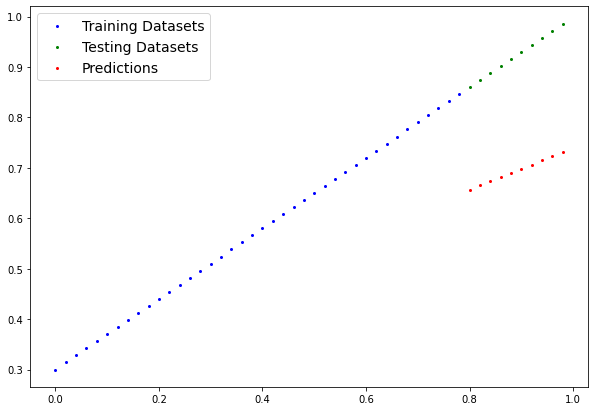

In [30]:
plot_predictions(predictions=y_preds_new)

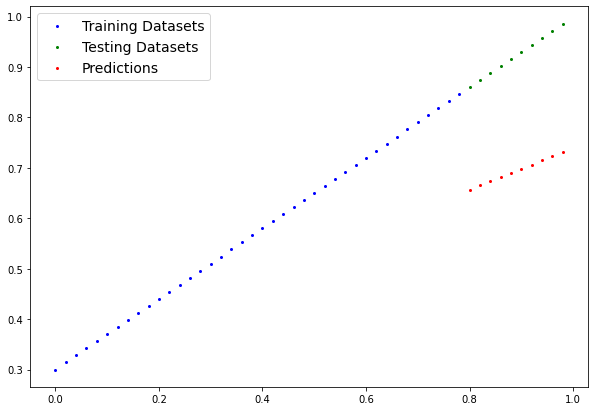

In [31]:
plot_predictions(predictions =y_preds_new)

In [32]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.4146])), ('bias', tensor([0.3250]))])

In [33]:
weight, bias

(0.7, 0.3)

##Saving a model in PyTorch

There are three main methods for saving and loading models in PyTorch

1. "torch.save()", allow to save PyTorch object in Python's pickle format
2. "torch.load()", allows to load a saved PyTorch object
3. "torch.nn.Module.load_state_dict()", this allows to load a save models state dictionary

In [34]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.4146])), ('bias', tensor([0.3250]))])

In [35]:
# saving our PyTorch model

from pathlib import Path

#1. create models directory
MODEL_PATH=Path("Models")
MODEL_PATH.mkdir(parents=True, exist_ok =True)

#2. create model save path
MODEL_NAME= "01_PyTorch_Workflow_Amit_model_0.pth"
MODEL_SAVE_PATH= MODEL_PATH/MODEL_NAME

# 3. Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(),f=MODEL_SAVE_PATH)

Saving model to: Models/01_PyTorch_Workflow_Amit_model_0.pth


In [36]:
model_0

LinearRegressionModel()

In [37]:
!ls -l Models


total 8
-rw-r--r-- 1 root root 1227 Jan 11 09:07 01_PyTorch_Workflow_Amit_model_0.pth
-rw-r--r-- 1 root root 1271 Jan 11 08:50 01_pytorch_workflow_amit_v2.pth


###Loading a PyTorch model

since we saved our model state_dict() rather than the entire model, we'll create new instance of our model class and load state_dict() on that

In [38]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.4146])), ('bias', tensor([0.3250]))])

In [39]:
# to load in a saved state_dict we have to initiate a new instance of our model class
loaded_model_0=LinearRegressionModel()
#load the saved_dict of model_0 
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))



<All keys matched successfully>

In [40]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.4146])), ('bias', tensor([0.3250]))])

In [41]:
# make some predictions with our loaded model

loaded_model_0.eval()
with torch.inference_mode():
  loaded_model_preds = loaded_model_0(X_test)
loaded_model_preds


tensor([[0.6566],
        [0.6649],
        [0.6732],
        [0.6815],
        [0.6898],
        [0.6981],
        [0.7064],
        [0.7147],
        [0.7230],
        [0.7313]])

In [42]:
model_0.eval()
with torch.inference_mode():
  y_preds=model_0(X_test)

y_preds

tensor([[0.6566],
        [0.6649],
        [0.6732],
        [0.6815],
        [0.6898],
        [0.6981],
        [0.7064],
        [0.7147],
        [0.7230],
        [0.7313]])

In [43]:
# comparing loaded model preds with original model preds

y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

#Putting it all together

all in one place

In [44]:
# import PyTorch and matplotlib
import torch
from torch import nn
import matplotlib.pyplot as plt
#check PyTorch version
torch.__version__

'1.13.0+cu116'

### create device agnostic code
This means if we've got access to a gpum our code will use it (for potentially faster computing)

if no GPU is available, the code will default use CPU

In [45]:
#setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Device ={device}")

Device =cuda


In [46]:
!nvidia-smi

Wed Jan 11 09:07:49 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   75C    P8    10W /  70W |      3MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

### Data

In [47]:
# create some data using some linear regression formula, y= weight * X +bias
weight = 0.6
bias =0.4

#create range values
start =0
end =1
step=0.02

#create X and y (features and labels)
X=torch.arange(start, end, step).unsqueeze(dim=1)
y=weight * X +bias

X[:10], y[:10]


(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]), tensor([[0.4000],
         [0.4120],
         [0.4240],
         [0.4360],
         [0.4480],
         [0.4600],
         [0.4720],
         [0.4840],
         [0.4960],
         [0.5080]]))

In [48]:
#split data for test and train

train_split = int(0.8*len(X))
X_train, y_train = X[:train_split],y[:train_split]
X_test, y_test =X[train_split:], y[train_split:]
len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

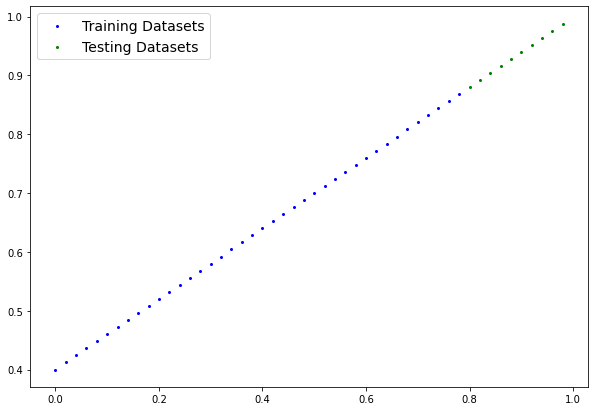

In [49]:
# plot the data
plot_predictions(X_train, y_train, X_test, y_test)

### Building a PyTorch linear model

In [50]:
# create a linear model by subclassing nn.Module
class LinearRegressionModelV2(nn.Module):
  #constructor
  def __init__(self):
    super().__init__()
    # use nn.Linear() for creating the model parameters
    self.linear_layer = nn.Linear(in_features =1, out_features=1)
  
  def forward(self,X):
    return self.linear_layer(X)
  
#set the manual seed for reproducibility of the model
torch.manual_seed(42)
model_1 =LinearRegressionModelV2()
model_1, model_1.state_dict()



(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [51]:
# check the model current device
next(model_1.parameters()).device

device(type='cpu')

In [52]:
device

'cuda'

In [53]:
model_1.to(device)

LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [54]:
next(model_1.parameters()).device

device(type='cuda', index=0)

### Training
For training we need,
1. Loss function
2. Optimizer
3. Training Loop building
4. Testing Loop building

In [55]:
# setup loss function
loss_fn = nn.L1Loss()

#setup the optimizer
optimizer = torch.optim.Adam(params=model_1.parameters(),
                             lr=0.01)

In [56]:
# training lopp

torch.manual_seed(42)

epochs =200

#putting data on the target device  like the model
#(device agnostic code for data)
X_train= X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
  model_1.train()

  #forward pass
  y_pred = model_1(X_train)

  # calculate the loss
  loss = loss_fn(y_pred, y_train)

  # optimizer zero grad
  optimizer.zero_grad()

  #perform backward propagation
  loss.backward()

  # optimizer step
  optimizer.step()

  #testing
  model_1.eval()

  with torch.inference_mode():
    test_pred = model_1(X_test)
    test_loss = loss_fn(test_pred, y_test)
  
  # printing
  if epoch % 10==0:
    print(f"Epoch: {epoch}, Loss = {loss},test losss ={test_loss}")




Epoch: 0, Loss = 0.494177907705307,test losss =0.5575472116470337
Epoch: 10, Loss = 0.3551780581474304,test losss =0.3685474097728729
Epoch: 20, Loss = 0.21617817878723145,test losss =0.17954757809638977
Epoch: 30, Loss = 0.07717832177877426,test losss =0.010326123796403408
Epoch: 40, Loss = 0.04721915349364281,test losss =0.1394377201795578
Epoch: 50, Loss = 0.04124019294977188,test losss =0.10984499752521515
Epoch: 60, Loss = 0.026154672726988792,test losss =0.03475777432322502
Epoch: 70, Loss = 0.017659882083535194,test losss =0.035667549818754196
Epoch: 80, Loss = 0.009614315815269947,test losss =0.021207159385085106
Epoch: 90, Loss = 0.001864002668298781,test losss =0.0013659716350957751
Epoch: 100, Loss = 0.0018354930216446519,test losss =0.004277026746422052
Epoch: 110, Loss = 0.0006905838963575661,test losss =0.0004802107869181782
Epoch: 120, Loss = 0.0005806222907267511,test losss =0.002042538020759821
Epoch: 130, Loss = 0.0006521597388200462,test losss =0.0011421203380450606


In [57]:
# evaluate the model
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.5997]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3996], device='cuda:0'))])

In [58]:
weight, bias

(0.6, 0.4)

### making and evaluating predictions



In [59]:
# turn the model into evaluation mode
model_1.eval()

# make predictions on the test data
with torch.inference_mode():
  y_pred =model_1(X_test)
y_pred

tensor([[0.8793],
        [0.8913],
        [0.9033],
        [0.9153],
        [0.9273],
        [0.9393],
        [0.9513],
        [0.9633],
        [0.9753],
        [0.9872]], device='cuda:0')

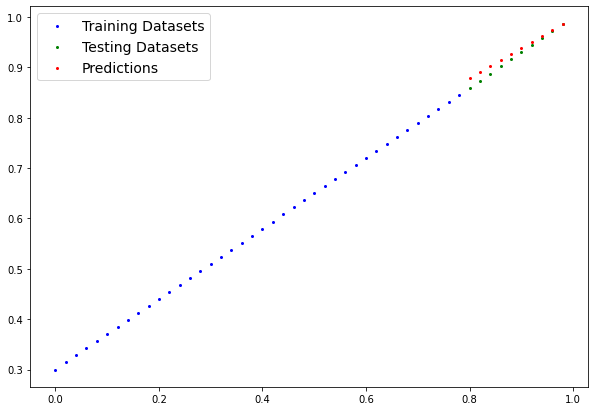

In [60]:
# check our model predictions visually
plot_predictions(predictions=y_pred.cpu())

### Saving and loading the trained model

In [61]:
from pathlib import Path

# create models directory
MODEL_PATH =Path("Models")
MODEL_PATH.mkdir(parents =True, exist_ok=True)

#create model save path
MODEL_NAME = "01_pytorch_workflow_amit_v2.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

MODEL_SAVE_PATH

# save thw model state dict
print(f"Saving model : {MODEL_SAVE_PATH}")
torch.save(obj=model_1.state_dict(),
           f=MODEL_SAVE_PATH)





Saving model : Models/01_pytorch_workflow_amit_v2.pth


In [62]:
#Load a PyTorch model

#create a new instance of linear regression model V2
loaded_model_1 = LinearRegressionModelV2()

# load the saved model_1 state_dict
loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))

#put the loaded model to the device
loaded_model_1.to(device)


LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [63]:
next(loaded_model_1.parameters()).device

device(type='cuda', index=0)

In [64]:
loaded_model_1.state_dict()


OrderedDict([('linear_layer.weight', tensor([[0.5997]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3996], device='cuda:0'))])

In [65]:
# evaluate loaded model
loaded_model_1.eval()
with torch.inference_mode():
  y_predi=loaded_model_1(X_test)

y_predi


tensor([[0.8793],
        [0.8913],
        [0.9033],
        [0.9153],
        [0.9273],
        [0.9393],
        [0.9513],
        [0.9633],
        [0.9753],
        [0.9872]], device='cuda:0')

In [66]:
y_pred == y_predi

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')

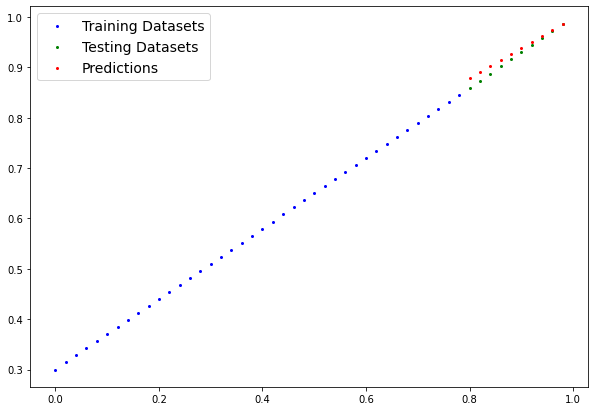

In [67]:
plot_predictions(predictions=y_predi.cpu())